In [1]:
# NO CODE 

from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import math
from scipy import stats

## Definition ##

The *expectation* of a random variable $X$, denoted $E(X)$, is the average of the possible values of $X$ weighted by their probabilities: 

$$
E(X) = \sum_{\text{all }x} xP(X=x)
$$

**Technical Note:** If $X$ has finitely many possible values, the sums above are always well defined and finite. If $X$ can have countably many values (that is, values indexed by 1, 2, 3, $\ldots$), then more care is needed to make sure that the formulas result in a well defined number. You don't have to worry about that in this course.

For example, suppose $X$ has the following distribution table.

|$~~~~~~~~~~~~~~~~~~~k$|1|2|3|4|5
|-----------------:|:---:|:---:|:---:|:---:|:---:|
|$P(X = k)$|$0.1$|$0.15$|$0.2$|$0.3$|$0.25$|

Then 

$$
E(X) ~ = ~ 1(0.1) + 2(0.15) + 3(0.2) + 4(0.3) + 5(0.25) ~ = ~ 3.45
$$

Here is the probability histogram of $X$ with $E(X)$ marked in red on the horizontal axis.

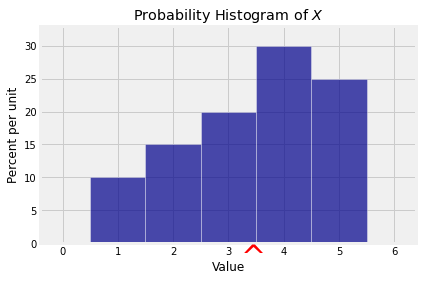

In [2]:
# NO CODE

x = np.arange(1, 6)
probs = make_array(0.1, 0.15, 0.2, 0.3, 0.25)
example_dist = Table().values(x).probabilities(probs)
Plot(example_dist, show_ev=True)
plt.title('Probability Histogram of $X$');

#### Notes ####

- $E(X)$ has the same units of measurement as $X$. For example, if $X$ is a weight in kilograms, then $E(X)$ is also in kilograms.
- Though $E(X)$ is sometimes called the "expected value" of $X$, the example shows that $E(X)$ need not be a possible value of $X$. It also need not be an integer even $X$ is integer-valued.
- If you imagine generating the random variable $X$ in the example many times, then about 10% of the time you expect to see the value 1, about 15% of the time you expect to see 2, and so on. So you can think of $E(X)$ as the long-run average value of $X$.
- Imagine the histogram made out of cardboard and attached to a wire that is the horizontal axis. The object will balance at its center of gravity. The formula for $E(X)$ is the same as the formula for the center of gravity of the object. We say that $E(X)$ is the *balance point* of the probability histogram of $X$. This is the sense in which $E(X)$ tells us the *location* of the distribution of $X$.

### Constant ###
This example seems silly but it is worth keeping in mind because it gets used all the time. Suppose a random variable $X$ is actually a constant $c$, that is, suppose $P(X = c) = 1$. Then the distribution of $X$ puts all its mass on the single value $c$, and $E(X) = c\cdot 1 = c$. We just write $E(c) = c$. 

### Bernoulli and Indicators ###

Success/failure trials appear so often in probability theory that they have multiple names. 

The first name is after the Swiss mathematician [Jacob Bernoulli](https://en.wikipedia.org/wiki/Jacob_Bernoulli). A random variable $X$ has the *Bernoulli* $(p)$ distribution if $P(X = 1)= p$
and $P(X = 0) = 1-p$. So

$$
E(X) = 0 \cdot (1-p) ~ + ~ 1 \cdot p ~ = ~ p
$$

These random variables are also often called *indicators*. Let $A$ be any event. Then the *indicator* of $A$ is the random variable $I_A$ that has the value 1 if $A$ occurs and 0 if $A$ doesn't occur. Thus $I_A$ is has the Bernoulli $(P(A))$ distribution and 

$$
E(I_A) = P(A)
$$

This shows that every probability is an expectation. Understanding expectation is the key to understanding much of probability theory.

### Uniform on $\{1, 2, 3, \ldots, n\}$

Let $n$ be a fixed positive integer. A random variable $X$ has the *uniform* distribution on the integers 1 through $n$ if $X$ is equally likely to have any of the values 1 through $n$.

For example, the number that appears on one roll of a die is a random variable that has the uniform distribution on $\{1, 2, 3, 4, 5, 6\}$.

The probability histogram of $X$ is flat over the possible values 1 through $n$, so it balances half-way between 1 and $n$. Thus

$$
E(X) ~ = ~ \frac{n+1}{2}
$$

You can also show this by algebra, using the fact that $P(X = k) = 1/n$ for $1 \le k \le n$, but the argument by symmetry is easier.

If $X$ is the number on a roll of a die, then $E(X) = 3.5$.

### Poisson $(\mu)$ ###

Let $X$ have the Poisson $(\mu)$ distribution. Then

$$
\begin{align*}
E(X) &= \sum_{k=0}^\infty k e^{-\mu} \frac{\mu^k}{k!} \\ \\
&= e^{-\mu} \mu \sum_{k=1}^\infty \frac{\mu^{k-1}}{(k-1)!} \\ \\
&= e^{-\mu} \mu \sum_{j=0}^\infty \frac{\mu^j}{j!} \\ \\
&= e^{-\mu} \mu e^{\mu} \\ \\
&= \mu
\end{align*}
$$

We now have an interpretation for the Poisson parameter $\mu$. It's the expectation of the random variable. We said earlier that the integer part of $\mu$ is the mode of $X$. But the interpretation of $\mu$ as an expected value will be used far more frequently. 

In the Bombing of London example in an earlier section, the Poisson (0.93) distribution was shown to be a good approximation to the observed distribution of the number of bomb hits on London locations during World War II. Now we can understand where that parameter 0.93 came from. It was the average number of hits per location.